In [4]:
import torch
import ot
import matplotlib.pyplot as pl
import ot.plot

In [7]:
import sys
sys.path.append('../code/ot_mmd/')

from mmdot import solve_apgd
from mmdot_mirror_descent import solve_md
from utils_mmd import get_cost_G, set_seed
from generate_data import make_data

In [8]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

device='cpu'
dtype = torch.DoubleTensor
print('Used device: '+device)

set_seed(0)

Used device: cpu


In [9]:
n,d=50,2
X,Y=make_data('gaussians',n,d)

a=torch.ones((n,))/n
b=torch.ones((n,))/n

In [10]:
v = {1: a, 2: b}

max_itr = 1000

lda = 10
C, G = get_cost_G(x=X, y=Y, khp=1e-3, ktype="rbf")

P1, obj_itr1 = solve_md(C, G, v, max_itr, lda, case="unb")
P2, obj_itr2 = solve_apgd(C, G, v, max_itr, lda, case="unb")

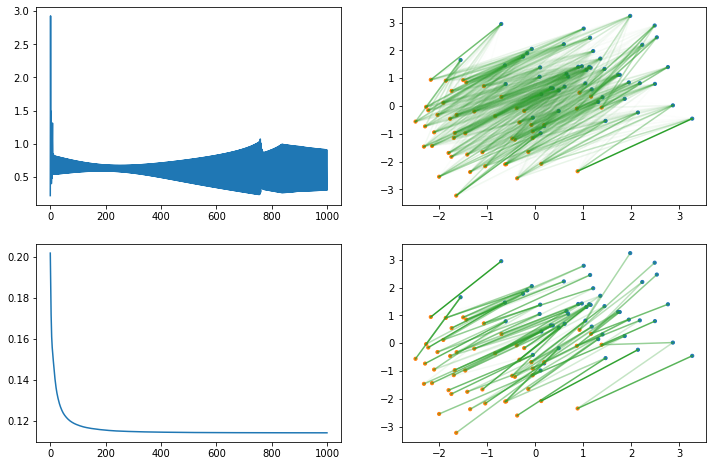

In [11]:
pl.figure(figsize=(12,8))
pl.subplot(2,2,1)
pl.plot(obj_itr1)

pl.subplot(2,2,2)
ot.plot.plot2D_samples_mat(X.numpy(), Y.numpy(), P1.numpy(), c='C2')
pl.scatter(X[:, 0], X[:, 1], c='C0', label='Source',s=a*500)
pl.scatter(Y[:, 0], Y[:, 1], c='C1', label='Target',s=b*500)

pl.subplot(2,2,3)
pl.plot(obj_itr2)

pl.subplot(2,2,4)
ot.plot.plot2D_samples_mat(X.numpy(), Y.numpy(), P2.numpy(), c='C2')
pl.scatter(X[:, 0], X[:, 1], c='C0', label='Source',s=a*500)
pl.scatter(Y[:, 0], Y[:, 1], c='C1', label='Target',s=b*500)

In [12]:
lda = 10
C, G = get_cost_G(x=X, y=Y, khp=10, ktype="rbf")

P1, obj_itr1 = solve_md(C, G, v, max_itr, lda, case="bal")
P2, obj_itr2 = solve_apgd(C, G, v, max_itr, lda, case="bal")

In [ ]:
pl.figure(figsize=(12,8))
pl.subplot(2,2,1)
pl.plot(obj_itr1)

pl.subplot(2,2,2)
ot.plot.plot2D_samples_mat(X.numpy(), Y.numpy(), P1.numpy(), c='C2')
pl.scatter(X[:, 0], X[:, 1], c='C0', label='Source',s=a*500)
pl.scatter(Y[:, 0], Y[:, 1], c='C1', label='Target',s=b*500)

pl.subplot(2,2,3)
pl.plot(obj_itr2)

pl.subplot(2,2,4)
ot.plot.plot2D_samples_mat(X.numpy(), Y.numpy(), P2.numpy(), c='C2')
pl.scatter(X[:, 0], X[:, 1], c='C0', label='Source',s=a*500)
pl.scatter(Y[:, 0], Y[:, 1], c='C1', label='Target',s=b*500)